# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.4.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
143407,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143408,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143409,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143410,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143411,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
143407,2020-07-09,Colombia,Vichada,1,0,0,1
143408,2020-07-10,Colombia,Vichada,1,0,0,1
143409,2020-07-11,Colombia,Vichada,1,0,0,1
143410,2020-07-12,Colombia,Vichada,1,0,0,1
143411,2020-07-13,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
176,2020-07-09,7272,1071,325,5876
177,2020-07-10,7515,1211,325,5979
178,2020-07-11,7721,1302,325,6094
179,2020-07-12,7927,1433,325,6169
180,2020-07-13,8046,1498,325,6223


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-09,18380410,8919429,814223,8646758,0.044298,0.470433,0.086061
2020-07-10,18734147,9089826,820928,8823393,0.043820,0.470979,0.085120
2020-07-11,19096677,9291003,827181,8978493,0.043315,0.470160,0.084357
2020-07-12,19403978,9451967,831988,9120023,0.042877,0.470008,0.083600
2020-07-13,19404581,9452299,831991,9120291,0.042876,0.470007,0.083598


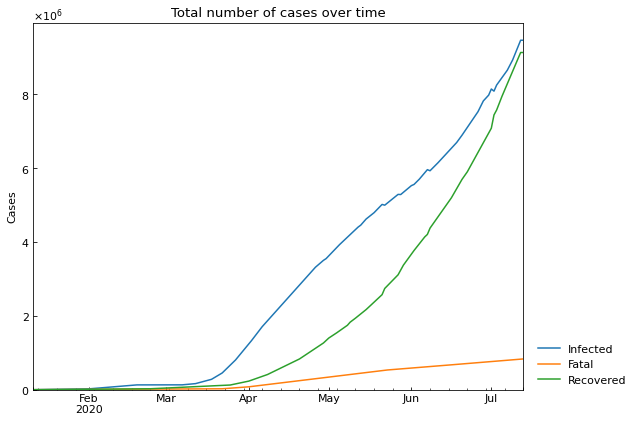

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
180,2020-07-09,20713,2271,981,17461
181,2020-07-10,21145,2517,981,17647
182,2020-07-11,21529,2707,982,17840
183,2020-07-12,21937,2955,982,18000
184,2020-07-13,22188,3105,983,18100


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
148,2020-07-08,20174,1863,980,17331
149,2020-07-09,20371,1924,981,17466
150,2020-07-10,20719,2085,982,17652
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
143407,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143408,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143409,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143410,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143411,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
783,CZE,Czech Republic,Plzenský kraj,584672
784,COL,Colombia,Bolívar,2070110
785,RUS,Russia,Murmansk oblast,795409
786,RUS,Russia,Republic of Crimea,1913731
787,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
143407,2020-07-09,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143408,2020-07-10,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143409,2020-07-11,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143410,2020-07-12,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
143411,2020-07-13,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
143407,2020-07-09,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
143408,2020-07-10,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
143409,2020-07-11,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
143410,2020-07-12,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
143411,2020-07-13,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
180,2020-07-09,2,0,1,0,0,0,0,3,2,2,1,27.78
181,2020-07-10,2,0,1,0,0,0,0,3,2,2,1,27.78
182,2020-07-11,2,0,1,0,0,0,0,3,2,2,1,27.78
183,2020-07-12,2,0,1,0,0,0,0,3,2,2,1,27.78
184,2020-07-13,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

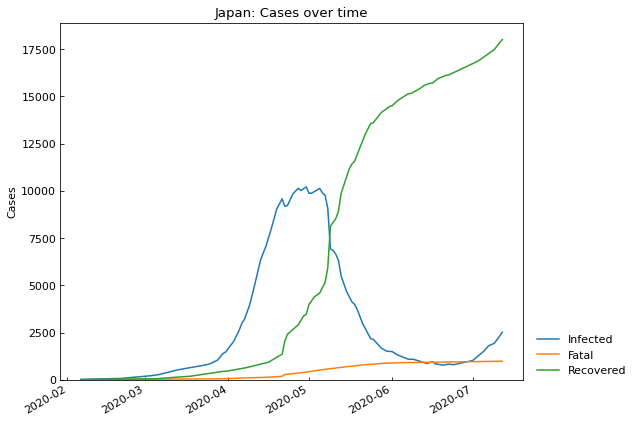

,Date,Confirmed,Infected,Fatal,Recovered
148,2020-07-08,20174,1863,980,17331
149,2020-07-09,20371,1924,981,17466
150,2020-07-10,20719,2085,982,17652
151,2020-07-11,21129,2298,982,17849
152,2020-07-12,21502,2517,982,18003


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

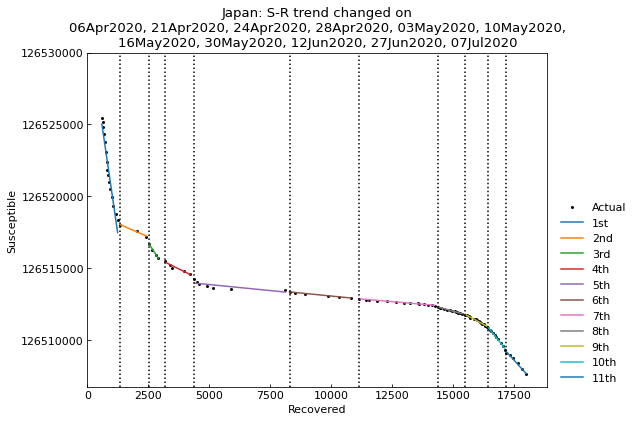

,Type,Start,End,Population
1st,Past,06Apr2020,20Apr2020,126529100
2nd,Past,21Apr2020,23Apr2020,126529100
3rd,Past,24Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,09May2020,126529100
6th,Past,10May2020,15May2020,126529100
7th,Past,16May2020,29May2020,126529100
8th,Past,30May2020,11Jun2020,126529100
9th,Past,12Jun2020,26Jun2020,126529100
10th,Past,27Jun2020,06Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 8 CPUs...

	11th phase with SIR-F model finished 289 trials in 0 min 25 sec.

	1st phase with SIR-F model finished 398 trials in 1 min 2 sec.

	2nd phase with SIR-F model finished 423 trials in 1 min 1 sec.

	3rd phase with SIR-F model finished 391 trials in 1 min 1 sec.

	6th phase with SIR-F model finished 121 trials in 0 min 20 sec.

	4th phase with SIR-F model finished 381 trials in 1 min 1 sec.

	5th phase with SIR-F model finished 372 trials in 1 min 1 sec.

	8th phase with SIR-F model finished 128 trials in 0 min 20 sec.

	10th phase with SIR-F model finished 134 trials in 0 min 20 sec.

	7th phase with SIR-F model finished 318 trials in 0 min 45 sec.

	9th phase with SIR-F model finished 271 trials in 0 min 35 sec.

Completed optimization. Total: 2 min 48 sec

In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,06Apr2020,20Apr2020,126529100,SIR-F,0.003588,0.000515,0.728662,0.988514,80,0.00,0.729,0,15,107,7.577469,398,1 min 2 sec
2nd,Past,21Apr2020,23Apr2020,126529100,SIR-F,0.002403,0.003244,0.506892,0.000040,80,0.36,0.507,1371,23,17,0.180324,423,1 min 1 sec
3rd,Past,24Apr2020,27Apr2020,126529100,SIR-F,0.001918,0.000739,0.178782,0.000090,80,1.90,0.179,616,28,75,0.119976,391,1 min 1 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.001428,0.001187,0.539218,0.000070,80,0.52,0.539,798,38,46,0.248286,381,1 min 1 sec
5th,Past,03May2020,09May2020,126529100,SIR-F,0.000722,0.001263,0.032658,0.000067,80,0.53,0.033,825,76,43,0.103990,372,1 min 1 sec
6th,Past,10May2020,15May2020,126529100,SIR-F,0.001185,0.003841,0.030714,0.000109,80,0.29,0.031,508,46,14,0.042588,121,0 min 20 sec
7th,Past,16May2020,29May2020,126529100,SIR-F,0.000907,0.004734,0.368640,0.000079,80,0.12,0.369,700,61,11,0.086260,318,0 min 45 sec
8th,Past,30May2020,11Jun2020,126529100,SIR-F,0.001935,0.003726,0.415428,0.000054,80,0.30,0.415,1022,28,14,0.111529,128,0 min 20 sec
9th,Past,12Jun2020,26Jun2020,126529100,SIR-F,0.004260,0.003715,0.239300,0.000059,80,0.86,0.239,939,13,14,0.103558,271,0 min 35 sec
10th,Past,27Jun2020,06Jul2020,126529100,SIR-F,0.008362,0.003902,0.028237,0.000775,80,1.74,0.028,71,6,14,0.077218,134,0 min 20 sec


### Accuracy of estimation

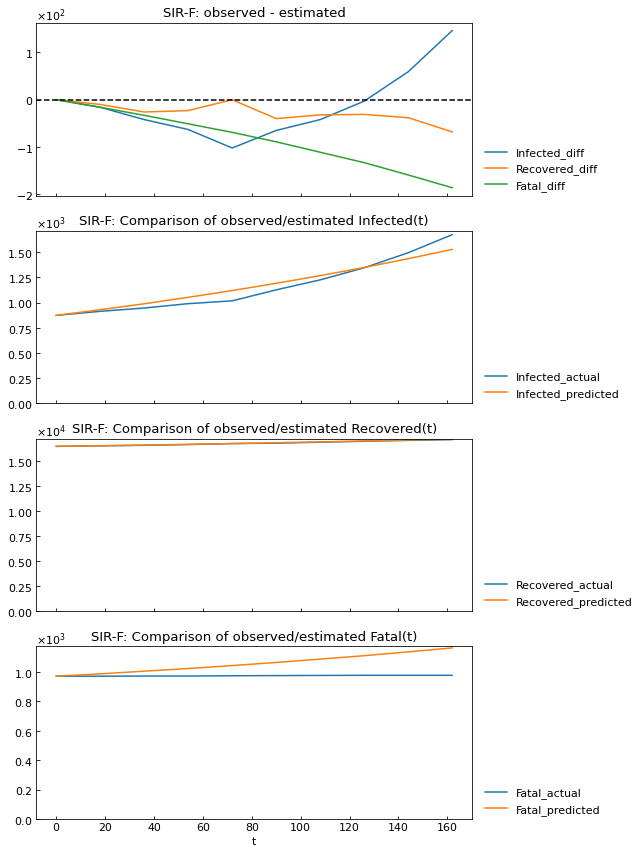

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.52

### Show parameter history

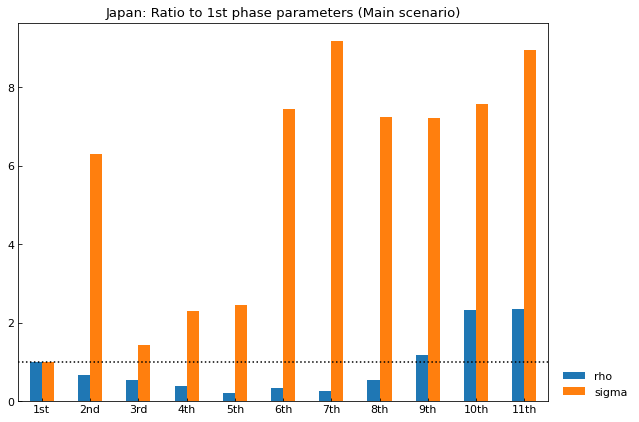

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
rho,1.0,0.669773,0.534584,0.397896,0.201285,0.330256,0.252692,0.539174,1.187182,2.330588,2.345511
sigma,1.0,6.293680,1.433998,2.302182,2.450957,7.452463,9.183971,7.229627,7.207593,7.569885,8.942718


In [31]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

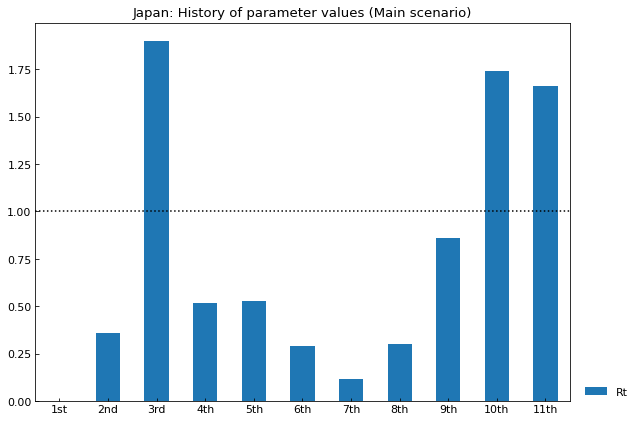

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th
Rt,0.0,0.36,1.9,0.52,0.53,0.29,0.12,0.3,0.86,1.74,1.66


In [32]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

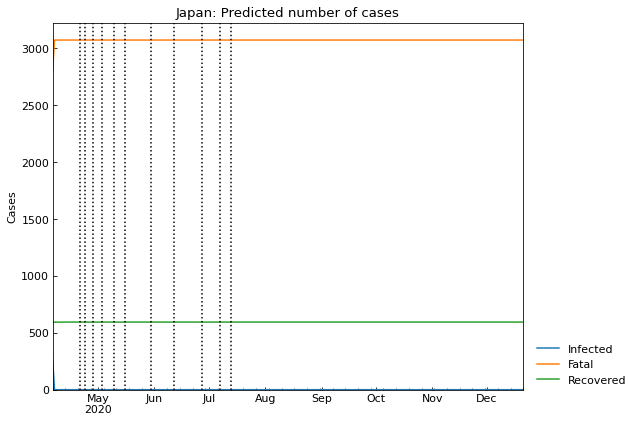

,Date,Fatal,Infected,Recovered,Susceptible
255,17Dec2020,3071,0,594,126525435
256,18Dec2020,3071,0,594,126525435
257,19Dec2020,3071,0,594,126525435
258,20Dec2020,3071,0,594,126525435
259,21Dec2020,3071,0,594,126525435


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.004609263946086996

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.009218527892173992

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.003588   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.002403   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.001918   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001428   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  11Jun2020   126529100  SIR-F  0.001935   
         9th      Past  12Jun2020  26Jun2020   126529100  SIR-F  0.004260   
         10th     Past  27Jun2020  06Jul2020   126529100  SIR-F  0.008362   
         11th     Past  07Jul2020  12Jul2020   126529100  SIR-F  0.008415   
         12th   Future  13Jul2020  01Jan2021   126529100  SIR-F  0.008415   
Medicine 1st      Past  06Apr2020  20Apr2020   126529100  SIR-F  0.003588   
         2nd      Past  21Apr2020  23Apr2020   126529100  SIR-F  0.002403   
         3rd      Past  24Apr2020  27Apr2020   126529100  SIR-F  0.001918   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001428   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  11Jun2020   126529100  SIR-F  0.001935   
         9th      Past  12Jun2020  26Jun2020   126529100  SIR-F  0.004260   
         10th     Past  27Jun2020  06Jul2020   126529100  SIR-F  0.008362   
         11th     Past  07Jul2020  12Jul2020   126529100  SIR-F  0.008415   
         12th   Future  13Jul2020  12Aug2020   126529100  SIR-F  0.008415   
         13th   Future  13Aug2020  01Jan2021   126529100  SIR-F  0.008415   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.000515  0.728662  0.988514   80  0.00       0.729   
         2nd    0.003244  0.506892  0.000040   80  0.36       0.507   
         3rd    0.000739  0.178782  0.000090   80  1.90       0.179   
         4th    0.001187  0.539218  0.000070   80  0.52       0.539   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.003726  0.415428  0.000054   80  0.30       0.415   
         9th    0.003715  0.239300  0.000059   80  0.86       0.239   
         10th   0.003902  0.028237  0.000775   80  1.74       0.028   
         11th   0.004609  0.054594  0.000170   80  1.66       0.055   
         12th   0.004609  0.054594  0.000170   80  1.66       0.055   
Medicine 1st    0.000515  0.728662  0.988514   80  0.00       0.729   
         2nd    0.003244  0.506892  0.000040   80  0.36       0.507   
         3rd    0.000739  0.178782  0.000090   80  1.90       0.179   
         4th    0.001187  0.539218  0.000070   80  0.52       0.539   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.003726  0.415428  0.000054   80  0.30       0.415   
         9th    0.003715  0.239300  0.000059   80  0.86       0.239   
         10th   0.003902  0.028237  0.000775   80  1.74       0.028   
         11th   0.004609  0.054594  0.000170   80  1.66       0.055   
         12th   0.004609  0.054594  0.000170   80  1.66       0.055   
         13th   0.009219  0.054594  0.000170   80  0.85       0.055   

                1/al

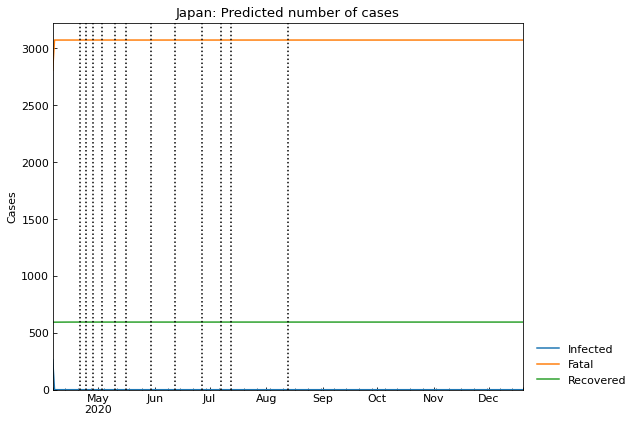

,Date,Fatal,Infected,Recovered,Susceptible
254,16Dec2020,3071,0,594,126525435
255,17Dec2020,3071,0,594,126525435
256,18Dec2020,3071,0,594,126525435
257,19Dec2020,3071,0,594,126525435
258,20Dec2020,3071,0,594,126525435


In [37]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 21Dec2020,Fatal on 21Dec2020,Infected on 20Dec2020,Fatal on 20Dec2020
Main,264,06Apr2020,0.0,3071.0,NaN,NaN
Medicine,264,06Apr2020,NaN,NaN,0.0,3071.0
